# UnSupevised - Clustering


Similar Car Recommendation using K Means Clustering

Read dataset

In [1]:
import pandas as pd
A = pd.read_csv("F:/Etlhive/Datasets/Cars93.csv")

In [2]:
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [3]:
from warnings import filterwarnings
filterwarnings("ignore")

Which columns should be used for clustering
This will be based on your domain knowledge and customer perception. Example: In India general buying is based on Price | MPG.city

In [5]:
B = A[["Price","MPG.city","Horsepower","Width","Type","Length"]]

Standardize

In [6]:
from PM8wdnew import preprocessing
Bnew = preprocessing(B)

In [7]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=7)
model = km.fit(Bnew)

In [8]:
model.labels_

array([1, 2, 4, 2, 2, 5, 0, 0, 5, 0, 2, 4, 4, 6, 5, 6, 6, 0, 2, 0, 4, 0,
       1, 1, 4, 6, 5, 2, 1, 0, 3, 1, 4, 4, 4, 6, 5, 0, 3, 1, 4, 3, 4, 1,
       1, 1, 5, 2, 2, 2, 0, 0, 1, 1, 4, 6, 2, 4, 2, 1, 5, 1, 2, 1, 4, 6,
       5, 4, 5, 6, 0, 4, 1, 4, 6, 5, 6, 4, 1, 3, 1, 4, 3, 1, 4, 5, 6, 1,
       6, 4, 4, 4, 5])

In [9]:
Bnew['Cluster_no']=model.labels_

In [10]:
Bnew['Make']=A.Make

In [11]:
Bnew.sort_values(by="Cluster_no").head(3)

,Price,MPG.city,Horsepower,Width,Length,Type_Compact,Type_Large,Type_Midsize,Type_Small,Type_Sporty,Type_Van,Cluster_no,Make
70,0.123897,-0.602126,0.502419,1.230149,1.225290,0,1,0,0,0,0,0,Oldsmobile Eighty-Eight
21,1.039862,-0.423219,0.060893,-0.100128,1.362996,0,1,0,0,0,0,0,Chrysler Imperial
19,-0.115503,-0.423219,0.176074,1.230149,1.362996,0,1,0,0,0,0,0,Chrylser Concorde


#Find similar cars for a given car

In [12]:
w = input("Enter the car Make: ")
cluster_no_on_input_car = Bnew[Bnew.Make==w].Cluster_no.values[0]
similar_cars = list(Bnew[(Bnew['Cluster_no'] == cluster_no_on_input_car) & (Bnew.Make != w)].Make.values)

Enter the car Make: Audi 100


In [13]:
similar_cars

['Acura Legend',
 'BMW 535i',
 'Cadillac Seville',
 'Chevrolet Corvette',
 'Dodge Stealth',
 'Infiniti Q45',
 'Lexus ES300',
 'Lexus SC300',
 'Mazda RX-7',
 'Mercedes-Benz 300E',
 'Mitsubishi Diamante']

In [14]:
Bnew

,Price,MPG.city,Horsepower,Width,Length,Type_Compact,Type_Large,Type_Midsize,Type_Small,Type_Sporty,Type_Van,Cluster_no,Make
0,-0.375720,0.471312,-0.073484,-0.366184,-0.427186,0,0,0,1,0,0,1,Acura Integra
1,1.497844,-0.781032,1.078322,0.431983,0.812171,0,0,1,0,0,0,2,Acura Legend
2,0.998227,-0.423219,0.540813,-0.632239,-0.220626,1,0,0,0,0,0,4,Audi 90
3,1.893374,-0.602126,0.540813,0.165927,0.674465,0,0,1,0,0,0,2,Audi 100
4,1.091905,-0.065407,1.231897,-0.100128,0.192493,0,0,1,0,0,0,2,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.019810,-0.959938,-0.668585,0.698038,0.261346,0,0,0,0,0,1,6,Volkswagen Eurovan
89,0.051036,-0.244313,-0.188665,-0.632239,-0.220626,1,0,0,0,0,0,4,Volkswagen Passat
90,0.394523,-0.781032,0.655993,-0.898295,-1.666543,0,0,0,0,1,0,4,Volkswagen Corrado
91,0.332071,-0.244313,-0.572601,-0.632239,0.467905,1,0,0,0,0,0,4,Volvo 240


In [20]:
B = A[["Price","MPG.city","Horsepower","Width","Type","Length"]]
from PM8wdnew import preprocessing
Q = preprocessing(B)

k = range(1,15,1)
WCSS = []
for i in k:
    from sklearn.cluster import KMeans
    km = KMeans(n_clusters=i)
    model = km.fit(Q)
    WCSS.append(model.inertia_)

In [21]:
k

range(1, 15)

In [22]:
WCSS

[541.0215053763441,
 308.83036388537914,
 239.24237332190194,
 193.0971008771944,
 169.70014697207756,
 149.9414407627927,
 131.85074504806167,
 120.20886031377906,
 105.67944789474068,
 93.889903777527,
 86.3362433708997,
 80.39030666864163,
 77.34369358513712,
 71.31894566239767]

Text(0.5, 1.0, 'Elbow curve')

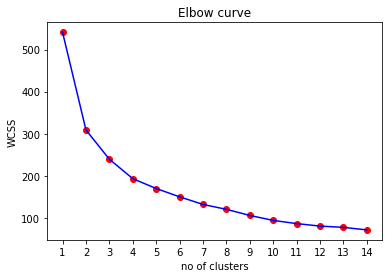

In [23]:
import matplotlib.pyplot as plt
plt.scatter(k,WCSS,c="red")
plt.plot(k,WCSS,c="blue")
plt.xticks(range(1,15,1))
plt.xlabel("no of clusters")
plt.ylabel("WCSS")
plt.title("Elbow curve")

Similar Car Recommendation using Hierarchical Clustering

In [24]:
import pandas as pd
A = pd.read_csv("F:/Etlhive/Datasets/Cars93.csv")

In [25]:
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [26]:
B = A[["Price","MPG.city"]]

In [27]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
C=pd.DataFrame(ss.fit_transform(B),columns=["Price","MPG.city"])

In [28]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=4)

In [29]:
model = agc.fit(C)

In [30]:
model.labels_

array([2, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 2, 2, 3, 2, 3, 3, 3, 1, 3, 2, 1,
       0, 2, 2, 3, 2, 1, 0, 3, 0, 2, 2, 2, 2, 3, 3, 3, 0, 0, 2, 0, 2, 0,
       2, 2, 3, 1, 1, 1, 1, 1, 0, 0, 2, 3, 1, 1, 1, 2, 3, 0, 1, 0, 2, 3,
       3, 2, 2, 3, 3, 2, 0, 2, 3, 3, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 1, 2,
       3, 3, 1, 3, 1], dtype=int64)

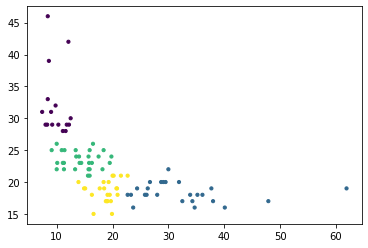

In [31]:
import matplotlib.pyplot as plt
plt.scatter(B['Price'],B['MPG.city'],c=model.labels_,s=10)

In [32]:
B['model']=A.Model
B['cluster']=model.labels_

In [33]:
m = input("Enter car model: ")
cl = int(B[B.model == m].cluster)

Enter car model: Century


In [34]:
Q = list(B[B.cluster == cl].model)
Q.remove(m)
print("Similar Cars: ",Q)

Similar Cars:  ['Integra', 'Cavalier', 'Corsica', 'Lumina', 'LeBaron', 'Shadow', 'Spirit', 'Dynasty', 'Escort', 'Tempo', 'Mustang', 'Probe', 'Prelude', 'Accord', 'Elantra', 'Scoupe', '626', 'Capri', 'Altima', 'Achieva', 'Cutlass_Ciera', 'Laser', 'Sunbird', 'Loyale', 'Legacy', 'Celica', 'Camry', 'Fox']
